In [1]:
import numpy as np
import os
import math
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score ,  precision_score, recall_score, f1_score, confusion_matrix




# Fetching Mnist 784 Dataset

In [4]:


from sklearn.datasets import fetch_openml

X,y = fetch_openml('mnist_784',version=1, cache=True, return_X_y=True )



URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:997)>

# convert y to integer

In [3]:

# Use the notion of y=f(X)
y = y.astype(int)


NameError: name 'y' is not defined

In [ ]:

print('Data size: {0} x {1} and label size {2}'.format( X.shape[0] ,   X.shape[1]  ,  y.shape[0] ) )
print('The images are of size: {0} x {0}'.format(math.sqrt (X.shape[1])   ))




# Test and Training Data

Split data into test and training data after re-shuffling the data. We can simply take the first 60000 as training and the last 10000 as test.

In [6]:


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X,  y, test_size = 0.1, stratify=y, random_state=42)


In [ ]:

print(  " The Number of Training data is " ,  X_train.shape[0] )
print(  " The Number of Testing data is "  ,  X_test.shape[0] )



In [7]:


from sklearn.neural_network import MLPClassifier

MLP_model = MLPClassifier( hidden_layer_sizes= ( 200 , 400 , 150 , 100) ,   max_iter=10,solver='sgd',activation='relu',verbose=True,validation_fraction=0.0)

MLP_model.fit(X_train, y_train)




Iteration 1, loss = 1.11445237
Iteration 2, loss = 0.23660502
Iteration 3, loss = 0.17708872
Iteration 4, loss = 0.14204399
Iteration 5, loss = 0.12082762
Iteration 6, loss = 0.10603697
Iteration 7, loss = 0.09327202
Iteration 8, loss = 0.08268201
Iteration 9, loss = 0.07351411
Iteration 10, loss = 0.06685896


C:\Users\madkour\PycharmProjects\dl\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(200, 400, 150, 100), max_iter=10,
              solver='sgd', validation_fraction=0.0, verbose=True)

In [8]:


print( MLP_model.n_layers_ )

print( MLP_model.hidden_layer_sizes)
for layer in range( MLP_model.n_layers_-1 ):
    print( "Layer " , layer , "Weights " , MLP_model.coefs_[layer].shape , "Bias is " , MLP_model.intercepts_[layer].shape )  

    

6
(200, 400, 150, 100)
Layer  0 Weights  (784, 200) Bias is  (200,)
Layer  1 Weights  (200, 400) Bias is  (400,)
Layer  2 Weights  (400, 150) Bias is  (150,)
Layer  3 Weights  (150, 100) Bias is  (100,)
Layer  4 Weights  (100, 10) Bias is  (10,)


(784,)
(28, 28)
[7]


C:\Users\madkour\PycharmProjects\dl\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


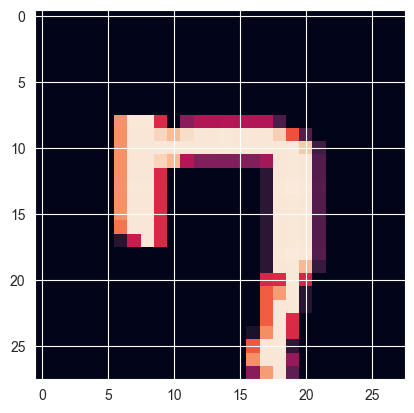

In [13]:
import math
import matplotlib.pyplot as plt
text_7=X_test[y_test==7].to_numpy()
inst=text_7[0]
print(inst.shape)
dim=int(math.sqrt(inst.shape[0]))
image=inst.reshape(dim,dim)
print(image.shape)
plt.imshow(image)
y_pred_test = MLP_model.predict([inst])

print(y_pred_test)



In [14]:


import seaborn as sns 


def drawing_conf_matrix(  y_actual , y_predict ):
    
    print( "Classification Report" )
    # to represent accuacy, precision, recall and f1 score

    conf_mat = confusion_matrix( y_actual,   y_predict )   # to represent confusion matrix ( TP , FP , FN , FN )
    
    print( "Confusion Matrix")
    print( conf_mat )
    sns.heatmap( conf_mat , annot= True  , fmt = "" )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    

In [19]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,MLP_model.predict(X_test))

print(ac)

0.9611428571428572


In [20]:
from sklearn.metrics import classification_report
print ( classification_report( y_test,MLP_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       690
           1       0.98      0.99      0.98       788
           2       0.97      0.94      0.96       699
           3       0.96      0.93      0.94       714
           4       0.96      0.96      0.96       682
           5       0.95      0.96      0.95       631
           6       0.98      0.99      0.98       688
           7       0.96      0.97      0.96       729
           8       0.92      0.96      0.94       683
           9       0.95      0.94      0.94       696

    accuracy                           0.96      7000
   macro avg       0.96      0.96      0.96      7000
weighted avg       0.96      0.96      0.96      7000
